In [28]:
import pandas as pd
import numpy as np  

In [120]:
hotel_city_chanel_combin_extract  = pd.read_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\other\\hotel_city_chanel_combin_extract.csv')
hotel_city_chanel_combin_extract

,Canal_ID,Cidade_ID,Hotel_ID
0,252,405260.0,11332.0
1,1245,509072.0,NaN
2,124,544005.0,16573.0
3,676,21523.0,12517.0
4,104,151597.0,5882.0
...,...,...,...
353799,1023,6202993.0,15882.0
353800,119,6202993.0,19278.0
353801,942,6202993.0,15845.0
353802,677,6202993.0,16184.0


In [122]:
hotel_city_chanel_combin_extract  = pd.read_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\other\\hotel_city_chanel_combin_extract.csv')
hotel_city_chanel_combin_extract

,Canal_ID,Cidade_ID,Hotel_ID
0,252,405260.0,11332.0
1,1245,509072.0,NaN
2,124,544005.0,16573.0
3,676,21523.0,12517.0
4,104,151597.0,5882.0
...,...,...,...
353799,1023,6202993.0,15882.0
353800,119,6202993.0,19278.0
353801,942,6202993.0,15845.0
353802,677,6202993.0,16184.0


In [143]:
def get_unseen_hotels(df, canal_ids):
    if isinstance(canal_ids, int):
        canal_ids = [canal_ids]
    
    result = {}
    
    for canal_id in canal_ids:
        # Get the Cidade_IDs corresponding to the given Canal_ID
        cidade_ids = df[df['Canal_ID'] == canal_id]['Cidade_ID'].unique()
        
        # Get all Hotel_IDs in the corresponding Cidade_IDs
        all_hotels_in_cidade = df[df['Cidade_ID'].isin(cidade_ids)]['Hotel_ID'].unique()
        
        # Get the Hotel_IDs already seen by the given Canal_ID
        seen_hotels = df[df['Canal_ID'] == canal_id]['Hotel_ID'].unique()
        
        # Get the Hotel_IDs not already seen by the given Canal_ID
        unseen_hotels = [hotel for hotel in all_hotels_in_cidade if hotel not in seen_hotels]
        
        result[canal_id] = unseen_hotels
    
    return result

# Example usage:
unseen_hotels = get_unseen_hotels(hotel_city_chanel_combin_extract, [124])
print(unseen_hotels)

{124: [11332.0, nan, 5124.0, 3898.0, 16112.0, 13211.0, 15413.0, 7437.0, 17066.0, 10432.0, 17473.0, 4614.0, 5896.0, 6735.0, 6209.0, 9620.0, 9603.0, 10376.0, 18847.0, 5796.0, 16386.0, 6743.0, 10807.0, 14271.0, 925.0, 13889.0, 10233.0, 15610.0, 3088.0, 14313.0, 9813.0, 9274.0, 15341.0, 15390.0, 13925.0, 2374.0, 4893.0, 2089.0, 3765.0, 13685.0, 14320.0, 20039.0, 12502.0, 4071.0, 10321.0, 4379.0, 14631.0, 9494.0, 19909.0, 7359.0, 15630.0, 6231.0, 3739.0, 1951.0, 13784.0, 16945.0, 9869.0, 8829.0, 10883.0, 20057.0, 19548.0, 9686.0, 5420.0, 10790.0, 19106.0, 14060.0, 10751.0, 7418.0, 11046.0, 13979.0, 14460.0, 14262.0, 1474.0, 10555.0, 10348.0, 17808.0, 17792.0, 17503.0, 11303.0, 9177.0, 15624.0, 15608.0, 19097.0, 7748.0, 15199.0, 10690.0, 3961.0, 1925.0, 17492.0, 10848.0, 8045.0, 8759.0, 18960.0, 15015.0, 16162.0, 18456.0, 5755.0, 6133.0, 19025.0, 6463.0, 8862.0, 1970.0, 20442.0, 5560.0, 14104.0, 13927.0, 18493.0, 18944.0, 7779.0, 5983.0, 16376.0, 9104.0, 18751.0, 7830.0, 20779.0, 13304.0, 15

In [151]:
hotel_city_chanel_combin_extract[(hotel_city_chanel_combin_extract['Cidade_ID'] == 1571478) & (hotel_city_chanel_combin_extract['Hotel_ID'] == 13211)]


,Canal_ID,Cidade_ID,Hotel_ID
11,833,1571478.0,13211.0
11162,408,1571478.0,13211.0
56595,672,1571478.0,13211.0
78241,1298,1571478.0,13211.0
105736,1168,1571478.0,13211.0
120984,1108,1571478.0,13211.0
179522,225,1571478.0,13211.0
212273,608,1571478.0,13211.0


In [150]:
hotel_city_chanel_combin_extract[(hotel_city_chanel_combin_extract['Canal_ID'] == 124) & (hotel_city_chanel_combin_extract['Cidade_ID'] == 1571478)]

,Canal_ID,Cidade_ID,Hotel_ID
15408,124,1571478.0,14332.0
17417,124,1571478.0,17112.0
31962,124,1571478.0,10068.0
91127,124,1571478.0,19307.0
102892,124,1571478.0,6487.0
112956,124,1571478.0,10794.0
174333,124,1571478.0,6778.0
201119,124,1571478.0,13929.0


In [152]:
unseen_hotels_df = pd.DataFrame.from_dict(unseen_hotels, orient='index').transpose()
unseen_hotels_df

,124
0,11332.0
1,NaN
2,5124.0
3,3898.0
4,16112.0
...,...
10691,19765.0
10692,17482.0
10693,14836.0
10694,17828.0


In [139]:

ix = hotel_city_chanel_combin_extract[hotel_city_chanel_combin_extract['Hotel_ID'].isin([16573])]['Canal_ID'].unique()

In [30]:
# Split the 'distinct_combinations' column into two separate columns
data_lake_prd_314410_cz_hoteis_canais_combinations[['Hotel_ID', 'Canal_ID']] = data_lake_prd_314410_cz_hoteis_canais_combinations['distinct_combinations'].str.split('-', expand=True)

# Convert the new columns to integers
data_lake_prd_314410_cz_hoteis_canais_combinations['Hotel_ID'] = data_lake_prd_314410_cz_hoteis_canais_combinations['Hotel_ID'].astype(int)
data_lake_prd_314410_cz_hoteis_canais_combinations['Canal_ID'] = data_lake_prd_314410_cz_hoteis_canais_combinations['Canal_ID'].astype(int)

# Drop the original 'distinct_combinations' column
data_lake_prd_314410_cz_hoteis_canais_combinations.drop(columns=['distinct_combinations'], inplace=True)
data_lake_prd_314410_cz_hoteis_canais_combinations

,Hotel_ID,Canal_ID
0,3869,32
1,9258,32
2,2059,32
3,5874,672
4,12648,124
...,...,...
330325,2997,828
330326,14177,289
330327,17866,289
330328,16975,634


In [31]:
data_lake_prd_314410_cz_hoteis = pd.read_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\lookups\\data-lake-prd-314410.cz.hoteis.csv')
data_lake_prd_314410_cz_hoteis

,Hotel_ID,Rede_ID,Hotel,Estrelas,Endereco,Bairro,CEP,Quartos,CategoriaHotel,Moeda,StatusHotel,Cidade_ID
0,3728,7,Gran Bourbon Hotel Asunción,5.0,Avda Sudamericana 3104 esq. Atilano Caceres,NaN,NaN,168.0,Hotel,USD,3. Ativo,8009868.0
1,3765,217,Tamarijn Aruba All Inclusive Resort,3.0,"J.E. Irausquin Blvd. 41 – Oranjestad,",NaN,NaN,236.0,Resort,USD,3. Ativo,8010716.0
2,4876,186,Dreams Las Mareas Costa Rica,5.0,"Playa El Jobo, La Cruz",NaN,NaN,447.0,Resort,USD,3. Ativo,251869.0
3,5113,217,Divi Aruba Beach Resort All Inclusive,4.0,"GWQQ+7P Oranjestad, Aruba",NaN,NaN,265.0,Resort,USD,3. Ativo,8010716.0
4,5114,217,Divi Dutch Village Beach Resort,4.0,"J.E. Irausquin Blvd 47, Oranjestad,",NaN,NaN,123.0,Resort,USD,3. Ativo,8010716.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19645,20835,555,VOA Pousada Divino Oleiro,3.0,"Av. Papemborg,SN",NaN,88190-000,35.0,Hotel,BRL,2. Em Implantação,6044433.0
19646,20606,0,Hotel Janaina,4.0,"Rua Rodolfo Patrocinio Goncalves Terreo, 50 - ...",Pereque,88210-000,23.0,Hotel,BRL,2. Em Implantação,1531473.0
19647,20764,0,Hotel Vivenda dos Sonhos,3.0,"R. Santa Maria, 40 - Carniel, Gramado - RS, 95...",Carniel,95670-792,15.0,Hotel,BRL,2. Em Implantação,4464157.0
19648,20366,79,Double Tree Canela,3.0,RUA JOSE PEDRO PIVA 277,NaN,95680-000,120.0,Hotel,BRL,2. Em Implantação,3146178.0


In [32]:
data_lake_prd_314410_cz_hoteis = data_lake_prd_314410_cz_hoteis[['Hotel_ID', 'Estrelas', 'Quartos', 'CategoriaHotel', 'Moeda', 'Cidade_ID']]

In [33]:
data_lake_prd_314410_cz_hoteis

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Moeda,Cidade_ID
0,3728,5.0,168.0,Hotel,USD,8009868.0
1,3765,3.0,236.0,Resort,USD,8010716.0
2,4876,5.0,447.0,Resort,USD,251869.0
3,5113,4.0,265.0,Resort,USD,8010716.0
4,5114,4.0,123.0,Resort,USD,8010716.0
...,...,...,...,...,...,...
19645,20835,3.0,35.0,Hotel,BRL,6044433.0
19646,20606,4.0,23.0,Hotel,BRL,1531473.0
19647,20764,3.0,15.0,Hotel,BRL,4464157.0
19648,20366,3.0,120.0,Hotel,BRL,3146178.0


In [34]:
data_lake_prd_314410_cz_cidades = pd.read_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\lookups\\data-lake-prd-314410.cz.cidades.csv')
data_lake_prd_314410_cz_cidades

,Cidade_ID,Cidade,UF,Pais,IBGE_ID,Hoteis
0,3728,Doudoun,NaN,Chad,NaN,0
1,3830,Retio,NaN,Chad,NaN,0
2,3996,Kodbouga,NaN,Chad,NaN,0
3,22227,Aodanga,NaN,Chad,NaN,0
4,34073,Sofoanga,NaN,Chad,NaN,0
...,...,...,...,...,...,...
46376,1444,Colchagua,Region del Libertador General Bernardo O'Higgins,Chile,NaN,1
46377,3579827,Providencia Y Santa Catalina,"Providencia y Santa Catalina, Departamento de ...",Colombia,NaN,0
46378,5584074,San Andres,"Providencia y Santa Catalina, Departamento de ...",Colombia,NaN,10
46379,2769679,Ushuaia,"Provincia de Tierra del Fuego, Antartida e Isl...",Argentina,NaN,5


In [35]:
data_lake_prd_314410_cz_cidades = data_lake_prd_314410_cz_cidades[['Cidade_ID', 'Pais']]

In [36]:
merged_data = pd.merge(data_lake_prd_314410_cz_hoteis, 
                       data_lake_prd_314410_cz_cidades, 
                       on='Cidade_ID', 
                       how='left')
merged_data

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Moeda,Cidade_ID,Pais
0,3728,5.0,168.0,Hotel,USD,8009868.0,Paraguay
1,3765,3.0,236.0,Resort,USD,8010716.0,NaN
2,4876,5.0,447.0,Resort,USD,251869.0,Costa Rica
3,5113,4.0,265.0,Resort,USD,8010716.0,NaN
4,5114,4.0,123.0,Resort,USD,8010716.0,NaN
...,...,...,...,...,...,...,...
19645,20835,3.0,35.0,Hotel,BRL,6044433.0,Brasil
19646,20606,4.0,23.0,Hotel,BRL,1531473.0,Brasil
19647,20764,3.0,15.0,Hotel,BRL,4464157.0,Brasil
19648,20366,3.0,120.0,Hotel,BRL,3146178.0,Brasil


In [37]:
country_counts = merged_data.groupby('Pais').size().reset_index(name='Counts').sort_values(by='Counts', ascending=False)
print(country_counts)

                  Pais  Counts
11              Brasil   14214
52            Portugal    1670
39              Mexico    1402
16            Colombia     722
2            Argentina     209
..                 ...     ...
41          Montenegro       1
44             Myanmar       1
56               Samoa       1
54  Russian Federation       1
37            Malaysia       1

[74 rows x 2 columns]


In [38]:
country_counts['Counts'].sum()

19397

In [39]:
19397/19650  # 1.3% of the hotels cannot be mapped to a country ?

0.9871246819338423

In [40]:
merged_data

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Moeda,Cidade_ID,Pais
0,3728,5.0,168.0,Hotel,USD,8009868.0,Paraguay
1,3765,3.0,236.0,Resort,USD,8010716.0,NaN
2,4876,5.0,447.0,Resort,USD,251869.0,Costa Rica
3,5113,4.0,265.0,Resort,USD,8010716.0,NaN
4,5114,4.0,123.0,Resort,USD,8010716.0,NaN
...,...,...,...,...,...,...,...
19645,20835,3.0,35.0,Hotel,BRL,6044433.0,Brasil
19646,20606,4.0,23.0,Hotel,BRL,1531473.0,Brasil
19647,20764,3.0,15.0,Hotel,BRL,4464157.0,Brasil
19648,20366,3.0,120.0,Hotel,BRL,3146178.0,Brasil


In [41]:
merged_data.dropna(subset=['Pais'], inplace=True)
merged_data.shape

(19397, 7)

In [42]:
merged_data.drop(columns=['Cidade_ID'], inplace=True)
merged_data

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Moeda,Pais
0,3728,5.0,168.0,Hotel,USD,Paraguay
2,4876,5.0,447.0,Resort,USD,Costa Rica
6,5116,4.0,129.0,Resort,USD,Bonaire Island
7,5117,4.0,210.0,Resort,USD,Saint Martin Island
10,5455,5.0,148.0,Hotel,USD,Colombia
...,...,...,...,...,...,...
19645,20835,3.0,35.0,Hotel,BRL,Brasil
19646,20606,4.0,23.0,Hotel,BRL,Brasil
19647,20764,3.0,15.0,Hotel,BRL,Brasil
19648,20366,3.0,120.0,Hotel,BRL,Brasil


In [43]:
merged_data

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Moeda,Pais
0,3728,5.0,168.0,Hotel,USD,Paraguay
2,4876,5.0,447.0,Resort,USD,Costa Rica
6,5116,4.0,129.0,Resort,USD,Bonaire Island
7,5117,4.0,210.0,Resort,USD,Saint Martin Island
10,5455,5.0,148.0,Hotel,USD,Colombia
...,...,...,...,...,...,...
19645,20835,3.0,35.0,Hotel,BRL,Brasil
19646,20606,4.0,23.0,Hotel,BRL,Brasil
19647,20764,3.0,15.0,Hotel,BRL,Brasil
19648,20366,3.0,120.0,Hotel,BRL,Brasil


In [44]:
data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency = pd.read_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\other\\data-lake-prd-314410.cz.pull-pesquisas_average_price_hotel_currency.csv')
data_lake_prd_314410_cz_moedas = pd.read_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\lookups\\data-lake-prd-314410.cz.moedas.csv')

In [45]:
# Perform left join
data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency = pd.merge(data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency, 
                     data_lake_prd_314410_cz_moedas[['Moeda_ID', 'Cotacao_USD']], 
                     on='Moeda_ID', 
                     how='left')

# Display the merged dataframe
print(data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency.head())

   Hotel_ID  Moeda_ID  weighted_mean_diaria  entry_count  Cotacao_USD
0     12867        16            212.042883        13626      0.16484
1      7263        16            225.353462         4219      0.16484
2      5325       109            209.312235          596      1.00000
3     14109        16            432.772017          294      0.16484
4     18594        16            287.639882         1868      0.16484


In [46]:
data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency['weighted_mean_diaria_usd'] = \
    data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency['weighted_mean_diaria'] * \
        data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency['Cotacao_USD']

In [47]:
data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency

,Hotel_ID,Moeda_ID,weighted_mean_diaria,entry_count,Cotacao_USD,weighted_mean_diaria_usd
0,12867,16,212.042883,13626,0.164840,34.953084
1,7263,16,225.353462,4219,0.164840,37.147196
2,5325,109,209.312235,596,1.000000,209.312235
3,14109,16,432.772017,294,0.164840,71.338007
4,18594,16,287.639882,1868,0.164840,47.414470
...,...,...,...,...,...,...
10429,13499,66,1162.219789,105,0.048835,56.756496
10430,5117,109,397.756751,74,1.000000,397.756751
10431,15869,16,180.583333,12,0.164840,29.767301
10432,15181,16,165.000000,6,0.164840,27.198549


In [48]:
merged_data = pd.merge(merged_data, 
                     data_lake_prd_314410_cz_pull_pesquisas_average_price_hotel_currency[['Hotel_ID', 'Cotacao_USD', 'weighted_mean_diaria_usd']], 
                     on='Hotel_ID', 
                     how='left')

merged_data

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Moeda,Pais,Cotacao_USD,weighted_mean_diaria_usd
0,3728,5.0,168.0,Hotel,USD,Paraguay,1.00000,165.789318
1,4876,5.0,447.0,Resort,USD,Costa Rica,1.00000,379.914749
2,5116,4.0,129.0,Resort,USD,Bonaire Island,1.00000,269.535294
3,5117,4.0,210.0,Resort,USD,Saint Martin Island,1.00000,397.756751
4,5455,5.0,148.0,Hotel,USD,Colombia,1.00000,82.787364
...,...,...,...,...,...,...,...,...
19394,20835,3.0,35.0,Hotel,BRL,Brasil,0.16484,47.729338
19395,20606,4.0,23.0,Hotel,BRL,Brasil,NaN,NaN
19396,20764,3.0,15.0,Hotel,BRL,Brasil,NaN,NaN
19397,20366,3.0,120.0,Hotel,BRL,Brasil,NaN,NaN


In [49]:
data_lake_prd_314410_cz_pull_pesquisas_estadia_x_reservas_volume = pd.read_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\other\\data-lake-prd-314410.cz.pull-pesquisas_estadia_x_reservas_volume.csv')


In [50]:
data_lake_prd_314410_cz_pull_pesquisas_estadia_x_reservas_volume

,Hotel_ID,total_reservas_estadia
0,1374,32442
1,3169,40194
2,6592,137554
3,9309,3604
4,7723,1937
...,...,...
10427,9920,1631
10428,15407,337
10429,18886,95
10430,15419,22


In [51]:
merged_data = pd.merge(merged_data, 
                     data_lake_prd_314410_cz_pull_pesquisas_estadia_x_reservas_volume, 
                     on='Hotel_ID', 
                     how='left')

merged_data

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Moeda,Pais,Cotacao_USD,weighted_mean_diaria_usd,total_reservas_estadia
0,3728,5.0,168.0,Hotel,USD,Paraguay,1.00000,165.789318,11024.0
1,4876,5.0,447.0,Resort,USD,Costa Rica,1.00000,379.914749,1958.0
2,5116,4.0,129.0,Resort,USD,Bonaire Island,1.00000,269.535294,121.0
3,5117,4.0,210.0,Resort,USD,Saint Martin Island,1.00000,397.756751,668.0
4,5455,5.0,148.0,Hotel,USD,Colombia,1.00000,82.787364,855.0
...,...,...,...,...,...,...,...,...,...
19394,20835,3.0,35.0,Hotel,BRL,Brasil,0.16484,47.729338,619.0
19395,20606,4.0,23.0,Hotel,BRL,Brasil,NaN,NaN,NaN
19396,20764,3.0,15.0,Hotel,BRL,Brasil,NaN,NaN,NaN
19397,20366,3.0,120.0,Hotel,BRL,Brasil,NaN,NaN,NaN


In [52]:
data_lake_prd_314410_cz_pull_pesquisas_estadia_x_reservas_x_price_receitas = pd.read_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\other\\data-lake-prd-314410.cz.pull-pesquisas_estadia_x_reservas_x_price_receitas.csv')
data_lake_prd_314410_cz_pull_pesquisas_estadia_x_reservas_x_price_receitas

,Hotel_ID,total_reservas_estadia_diaria
0,8825,1.624297e+07
1,12918,5.187404e+06
2,5515,1.001173e+07
3,12886,1.089337e+07
4,12893,2.798503e+05
...,...,...
10427,15627,9.802200e+04
10428,18581,3.627322e+04
10429,16479,3.662494e+04
10430,16382,1.664456e+04


In [53]:
merged_data = pd.merge(merged_data, 
                     data_lake_prd_314410_cz_pull_pesquisas_estadia_x_reservas_x_price_receitas, 
                     on='Hotel_ID', 
                     how='left')

merged_data

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Moeda,Pais,Cotacao_USD,weighted_mean_diaria_usd,total_reservas_estadia,total_reservas_estadia_diaria
0,3728,5.0,168.0,Hotel,USD,Paraguay,1.00000,165.789318,11024.0,1.931678e+06
1,4876,5.0,447.0,Resort,USD,Costa Rica,1.00000,379.914749,1958.0,7.595167e+05
2,5116,4.0,129.0,Resort,USD,Bonaire Island,1.00000,269.535294,121.0,3.108510e+04
3,5117,4.0,210.0,Resort,USD,Saint Martin Island,1.00000,397.756751,668.0,2.715896e+05
4,5455,5.0,148.0,Hotel,USD,Colombia,1.00000,82.787364,855.0,7.252123e+04
...,...,...,...,...,...,...,...,...,...,...
19394,20835,3.0,35.0,Hotel,BRL,Brasil,0.16484,47.729338,619.0,1.792005e+05
19395,20606,4.0,23.0,Hotel,BRL,Brasil,NaN,NaN,NaN,NaN
19396,20764,3.0,15.0,Hotel,BRL,Brasil,NaN,NaN,NaN,NaN
19397,20366,3.0,120.0,Hotel,BRL,Brasil,NaN,NaN,NaN,NaN


In [54]:
merged_data['total_reservas_estadia_diaria'] = \
    merged_data['total_reservas_estadia_diaria'] * \
        merged_data['Cotacao_USD']

merged_data

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Moeda,Pais,Cotacao_USD,weighted_mean_diaria_usd,total_reservas_estadia,total_reservas_estadia_diaria
0,3728,5.0,168.0,Hotel,USD,Paraguay,1.00000,165.789318,11024.0,1.931678e+06
1,4876,5.0,447.0,Resort,USD,Costa Rica,1.00000,379.914749,1958.0,7.595167e+05
2,5116,4.0,129.0,Resort,USD,Bonaire Island,1.00000,269.535294,121.0,3.108510e+04
3,5117,4.0,210.0,Resort,USD,Saint Martin Island,1.00000,397.756751,668.0,2.715896e+05
4,5455,5.0,148.0,Hotel,USD,Colombia,1.00000,82.787364,855.0,7.252123e+04
...,...,...,...,...,...,...,...,...,...,...
19394,20835,3.0,35.0,Hotel,BRL,Brasil,0.16484,47.729338,619.0,2.953935e+04
19395,20606,4.0,23.0,Hotel,BRL,Brasil,NaN,NaN,NaN,NaN
19396,20764,3.0,15.0,Hotel,BRL,Brasil,NaN,NaN,NaN,NaN
19397,20366,3.0,120.0,Hotel,BRL,Brasil,NaN,NaN,NaN,NaN


In [57]:
merged_data.drop(columns=['Moeda'], inplace=True)
merged_data

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Pais,Cotacao_USD,weighted_mean_diaria_usd,total_reservas_estadia,total_reservas_estadia_diaria
0,3728,5.0,168.0,Hotel,Paraguay,1.00000,165.789318,11024.0,1.931678e+06
1,4876,5.0,447.0,Resort,Costa Rica,1.00000,379.914749,1958.0,7.595167e+05
2,5116,4.0,129.0,Resort,Bonaire Island,1.00000,269.535294,121.0,3.108510e+04
3,5117,4.0,210.0,Resort,Saint Martin Island,1.00000,397.756751,668.0,2.715896e+05
4,5455,5.0,148.0,Hotel,Colombia,1.00000,82.787364,855.0,7.252123e+04
...,...,...,...,...,...,...,...,...,...
19394,20835,3.0,35.0,Hotel,Brasil,0.16484,47.729338,619.0,2.953935e+04
19395,20606,4.0,23.0,Hotel,Brasil,NaN,NaN,NaN,NaN
19396,20764,3.0,15.0,Hotel,Brasil,NaN,NaN,NaN,NaN
19397,20366,3.0,120.0,Hotel,Brasil,NaN,NaN,NaN,NaN


In [58]:
merged_data.drop(columns=['Cotacao_USD'], inplace=True)
merged_data

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Pais,weighted_mean_diaria_usd,total_reservas_estadia,total_reservas_estadia_diaria
0,3728,5.0,168.0,Hotel,Paraguay,165.789318,11024.0,1.931678e+06
1,4876,5.0,447.0,Resort,Costa Rica,379.914749,1958.0,7.595167e+05
2,5116,4.0,129.0,Resort,Bonaire Island,269.535294,121.0,3.108510e+04
3,5117,4.0,210.0,Resort,Saint Martin Island,397.756751,668.0,2.715896e+05
4,5455,5.0,148.0,Hotel,Colombia,82.787364,855.0,7.252123e+04
...,...,...,...,...,...,...,...,...
19394,20835,3.0,35.0,Hotel,Brasil,47.729338,619.0,2.953935e+04
19395,20606,4.0,23.0,Hotel,Brasil,NaN,NaN,NaN
19396,20764,3.0,15.0,Hotel,Brasil,NaN,NaN,NaN
19397,20366,3.0,120.0,Hotel,Brasil,NaN,NaN,NaN


In [59]:
merged_data.dropna(inplace=True)
merged_data

,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Pais,weighted_mean_diaria_usd,total_reservas_estadia,total_reservas_estadia_diaria
0,3728,5.0,168.0,Hotel,Paraguay,165.789318,11024.0,1.931678e+06
1,4876,5.0,447.0,Resort,Costa Rica,379.914749,1958.0,7.595167e+05
2,5116,4.0,129.0,Resort,Bonaire Island,269.535294,121.0,3.108510e+04
3,5117,4.0,210.0,Resort,Saint Martin Island,397.756751,668.0,2.715896e+05
4,5455,5.0,148.0,Hotel,Colombia,82.787364,855.0,7.252123e+04
...,...,...,...,...,...,...,...,...
19379,20683,3.0,6.0,Hotel,Brasil,945.769389,10.0,9.457694e+03
19380,20751,3.0,27.0,Hotel,Brasil,75.775539,19.0,1.304706e+03
19383,20602,4.0,11.0,Pousada,Brasil,218.574137,17.0,4.000649e+03
19385,20806,3.0,8.0,Pousada,Brasil,54.485975,18.0,1.070532e+03


In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [62]:
# Select relevant columns
numerical_cols = ['Estrelas', 'Quartos', 'weighted_mean_diaria_usd', 
                  'total_reservas_estadia', 'total_reservas_estadia_diaria']
categorical_cols = ['CategoriaHotel', 'Pais']

# Normalize numerical variables
scaler = StandardScaler()
data_scaled = scaler.fit_transform(merged_data[numerical_cols])

# Encode categorical variables
data_encoded = pd.get_dummies(merged_data[categorical_cols], drop_first=True)

# Combine normalized and encoded data
data_final = pd.concat([pd.DataFrame(data_scaled, columns=numerical_cols), data_encoded.reset_index(drop=True)], axis=1)


c:\Users\paulo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\paulo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\paulo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\paulo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

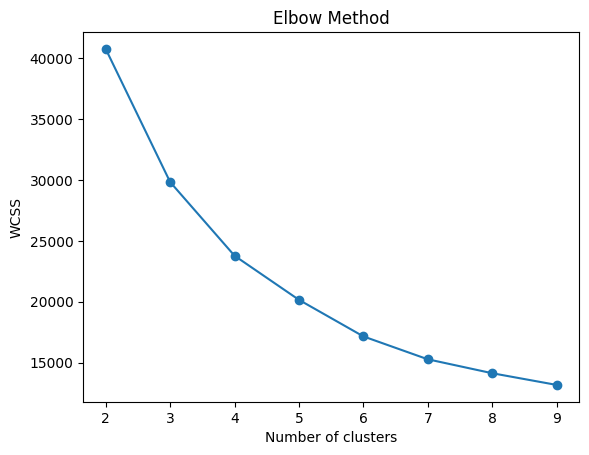

In [67]:
# Determine optimal number of clusters using the elbow method
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_final)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [68]:
# Choose optimal number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=10, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(data_final)

c:\Users\paulo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


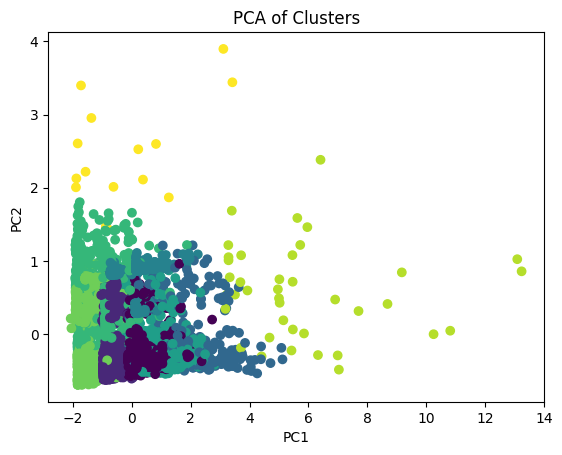

In [73]:
# Analyze contributions using PCA
pca = PCA(n_components=10)
pca_data = pca.fit_transform(data_final)
plt.scatter(pca_data[:, 2], pca_data[:, 4], c=merged_data['Cluster'], cmap='viridis')
plt.title('PCA of Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [76]:
# Analyze cluster centroids
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=data_final.columns)
important_vars = cluster_centers.T
important_vars.columns = [f'Cluster_{i}' for i in range(10)]
print(important_vars)

                                  Cluster_0     Cluster_1   Cluster_2  \
Estrelas                      -7.227813e-01  6.989437e-01   -0.653403   
Quartos                       -2.172210e-01 -2.044463e-03    1.938541   
weighted_mean_diaria_usd      -3.407059e-02 -7.399370e-03   95.434099   
total_reservas_estadia        -2.515098e-01 -2.091273e-01    0.658930   
total_reservas_estadia_diaria -2.034747e-02 -1.716409e-02  101.362943   
...                                     ...           ...         ...   
Pais_United Arab Emirates      7.812500e-04 -8.673617e-19    0.000000   
Pais_United Kingdom            2.604167e-04  5.770340e-04    0.000000   
Pais_United States             5.208333e-04  1.154068e-03    0.000000   
Pais_Uruguay                   2.343750e-03  4.616272e-03    0.000000   
Pais_Venezuela                -5.692061e-19  1.154068e-03    0.000000   

                                  Cluster_3     Cluster_4     Cluster_5  \
Estrelas                       9.899551e-01 -5.1

In [78]:
to_export = important_vars
to_export.tocsv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\output\\clusters.csv')

AttributeError: 'DataFrame' object has no attribute 'tocsv'

In [81]:
to_export.to_csv('c:\\Users\\paulo\\Desktop\\hotels brazil\\data\\other\\clusters.csv')

In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

def preprocess_data(data):
    """
    Preprocess the data to create a numerical feature matrix.
    - Scales numerical columns
    - One-hot encodes categorical columns
    - Converts boolean columns to numerical
    """
    # Define column groups
    numerical_cols = ['Estrelas', 'Quartos', 'weighted_mean_diaria_usd', 
                      'total_reservas_estadia', 'total_reservas_estadia_diaria']
    categorical_cols = ['CategoriaHotel', 'Pais']
    boolean_cols = data.select_dtypes(include=['bool']).columns.tolist()
    
    # Convert boolean columns to integers
    data[boolean_cols] = data[boolean_cols].astype(int)
    
    # Scale numerical columns
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data[numerical_cols])
    data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_cols, index=data.index)
    
    # One-hot encode categorical columns
    data_encoded = pd.get_dummies(data[categorical_cols], drop_first=True)
    
    # Combine scaled numerical, one-hot encoded categorical, and boolean features
    features = pd.concat([data_scaled_df, data_encoded, data[boolean_cols]], axis=1)
    return features

In [96]:
from scipy.spatial.distance import cdist

def rank_similar_hotels(hotel_id, data, features, metric='euclidean'):
    """
    Rank hotels based on similarity to a given Hotel_ID.
    """
    # Check if the Hotel_ID exists
    if hotel_id not in data['Hotel_ID'].values:
        raise ValueError(f"Hotel_ID {hotel_id} not found in the dataset.")
    
    # Get the index of the given Hotel_ID
    idx = data.index[data['Hotel_ID'] == hotel_id][0]
    
    # Compute pairwise distances
    distances = cdist([features.iloc[idx]], features, metric=metric)[0]
    
    # Add distances to the original dataset
    data_copy = data.copy()
    data_copy['Similarity'] = distances
    
    # Sort by similarity and return ranked hotels
    ranked = data_copy.sort_values('Similarity').reset_index(drop=True)
    return ranked[['Hotel_ID', 'Similarity']]


In [111]:
def rank_similar_hotels_cosine(hotel_id, data, features):
    """
    Rank hotels based on cosine similarity to a given Hotel_ID.
    """
    # Ensure the Hotel_ID exists
    if hotel_id not in data['Hotel_ID'].values:
        raise ValueError(f"Hotel_ID {hotel_id} not found in the dataset.")
    
    # Get the index of the given Hotel_ID
    idx = data.index[data['Hotel_ID'] == hotel_id][0]
    
    # Compute cosine similarity
    similarity_scores = cosine_similarity([features.iloc[idx]], features)[0]
    
    # Add similarity scores to the original dataset
    data_copy = data.copy()
    data_copy['Similarity'] = similarity_scores
    
    # Sort by similarity and return ranked results
    ranked = data_copy.sort_values('Similarity', ascending=False).reset_index(drop=True)
    return ranked[['Hotel_ID', 'Similarity']]

In [114]:
# Sample Data
data = merged_data

# Step 1: Preprocess the data
features = preprocess_data(data)

# Step 2: Rank hotels similar to Hotel_ID 3728 using cosine similarity
ranked_hotels = rank_similar_hotels_cosine(3728, data, features)

# Step 3: Print results
print(ranked_hotels)


       Hotel_ID  Similarity
0          3728    1.000000
1          9385    0.968176
2         17731    0.942254
3         20419    0.915496
4          3126    0.915268
...         ...         ...
10329      7032   -0.757405
10330      4915   -0.757871
10331      4976   -0.758736
10332     12859   -0.759725
10333     18845   -0.782790

[10334 rows x 2 columns]


In [116]:
merged_data[merged_data['Hotel_ID'].isin([3328, 9385, 17731])]


,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Pais,weighted_mean_diaria_usd,total_reservas_estadia,total_reservas_estadia_diaria,Cluster
264,17731,5.0,74.0,Hotel,Paraguay,67.829166,445.0,30549.245946,7
271,9385,5.0,99.0,Hotel,Paraguay,47.754495,2508.0,120680.149986,7
5377,3328,3.0,62.0,Hotel,Brasil,27.615872,19252.0,541974.119974,0


In [118]:
merged_data[merged_data['Cluster'].isin([0])]


,Hotel_ID,Estrelas,Quartos,CategoriaHotel,Pais,weighted_mean_diaria_usd,total_reservas_estadia,total_reservas_estadia_diaria,Cluster
13,10408,3.0,112.0,Hotel,Peru,33.802011,363.0,11230.988513,0
25,16598,3.0,200.0,Hotel,United Arab Emirates,110.000000,7.0,770.000000,0
28,16601,3.0,100.0,Hotel,United Arab Emirates,100.250000,22.0,2239.400000,0
30,16603,3.0,100.0,Hotel,United Arab Emirates,55.640000,155.0,8617.900000,0
39,18105,3.0,96.0,Hotel,Colombia,38.447704,327.0,12481.832209,0
...,...,...,...,...,...,...,...,...,...
19354,20766,3.0,40.0,Hotel,Brasil,43.287029,105.0,4854.463035,0
19357,20776,3.0,18.0,Hotel,Brasil,20.984093,3.0,62.952279,0
19379,20683,3.0,6.0,Hotel,Brasil,945.769389,10.0,9457.693893,0
19380,20751,3.0,27.0,Hotel,Brasil,75.775539,19.0,1304.706173,0
